In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

Load boxscore_df

In [2]:
boxscore_df = pd.read_csv('boxscore_df')
boxscore_df.head()

,Unnamed: 0,id_x,name,id_y,game_id,team_id,player_id,position,player_name,goals,...,caused_turnovers,faceoffs_won,faceoffs_taken,penalties,penalty_time,goalie_seconds,goals_allowed,goalie_saves,created_at,updated_at
0,0,2,Binghamton,4712,1,2,41.0,D,Chris Bechle,0,...,0,0,0,1,30,0,0,0,2023-10-24 16:37:17.319077,2023-10-24 16:37:17.319077
1,1,2,Binghamton,4713,1,2,48.0,D,George Diegnan,0,...,0,1,2,0,0,0,0,0,2023-10-24 16:37:17.319077,2023-10-24 16:37:17.319077
2,2,2,Binghamton,4714,1,2,51.0,D,Sean Finnigan,0,...,0,0,0,0,0,0,0,0,2023-10-24 16:37:17.319077,2023-10-24 16:37:17.319077
3,3,2,Binghamton,4715,1,2,57.0,M,Matt Kaser,0,...,0,0,0,0,0,0,0,0,2023-10-24 16:37:17.319077,2023-10-24 16:37:17.319077
4,4,2,Binghamton,4716,1,2,63.0,M,Anthony Lombardo,0,...,0,0,0,0,0,0,0,0,2023-10-24 16:37:17.319077,2023-10-24 16:37:17.319077


In [7]:
boxscore_df.shape

(1180290, 28)

Let's look at total goals by position

In [8]:
boxscore_df.groupby('position')['goals'].sum()

position
A    116019
D      2530
G       127
M     55449
Name: goals, dtype: int64

This makes sense. Most of the goals are scored by Attackers and Midfielders with a handful by Defenders and a couple by Goalies. I wonder what the counts by position are.

In [9]:
boxscore_df.groupby('position')['player_id'].count()

position
A    69311
D    73686
G    32902
M    72669
Name: player_id, dtype: int64

This also makes sense. Each team is typically comprised of three A's, M's, and D's with one G. 

Create a new df for the classifier to include only the stats that are being taken into consideration. Then remove all blank entries.

In [3]:
df = boxscore_df[['position',
       'goals', 'assists', 'points', 'shots', 'shots_on_goal',
       'ground_balls', 'turnovers',
       'caused_turnovers', 'faceoffs_won', 'faceoffs_taken', 'penalties',
       'penalty_time', 'goalie_seconds', 'goals_allowed', 'goalie_saves']]

df_noblanks = df[df['position'] != '']
df_noblanks = df_noblanks.dropna()

Compare the shapes of the overall df to the one without blanks.

In [11]:
df.shape, df_noblanks.shape

((1180290, 16), (248616, 16))

~21% of the data points are not blank. Although, that's a low percentage, it's based on 1.1 millions rows of data. There are plenty of data points to train and test on.

In [4]:
X = df_noblanks.drop('position', axis=1).values
y = df_noblanks['position'].values

Create training and testing sets with default parameters

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Starting low by checking scores for neighbors 1-19

In [22]:
for n in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    print('n= ', n)
    print('score= ', knn.score(X_test, y_test))  #with player ID; 1 = 71.5, 3 = 69.9
#knn = KNeighborsClassifier(n_neighbors=3)
#knn.fit(X_train, y_train)

n=  1
score=  0.6459278566142163
n=  2
score=  0.7027222704894295
n=  3
score=  0.6934388776265406
n=  4
score=  0.7112333880361682
n=  5
score=  0.7087395823277666
n=  6
score=  0.7230427647456318
n=  7
score=  0.7194388132702642
n=  8
score=  0.7250860765196125
n=  9
score=  0.7234289024037069
n=  10
score=  0.7281429996460405
n=  11
score=  0.7265662708755671
n=  12
score=  0.7298967081764649
n=  13
score=  0.7266949834282589
n=  14
score=  0.730073687936416
n=  15
score=  0.7285613154422885
n=  16
score=  0.7297197284165138
n=  17
score=  0.7299288863146378
n=  18
score=  0.7321813559867426
n=  19
score=  0.730524181870837


Not bad, but we can do better. With all this data, let's expand the neighbors search to 1000

In [13]:
knnscores = []
for n in range(10, 1001, 50):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    knnscores.append((n, knn.score(X_test, y_test)))
    print('n= ', n)
    print('score= ', knn.score(X_test, y_test)) 

n=  10
score=  0.7281429996460405
n=  60
score=  0.7362840686037906
n=  110
score=  0.7391801010393538
n=  160
score=  0.7387456961740194
n=  210
score=  0.7388422305885382
n=  260
score=  0.7372333236798919
n=  310
score=  0.7367989188145574
n=  360
score=  0.7367184734691251
n=  410
score=  0.7364610483637417
n=  460
score=  0.7360105544293207
n=  510
score=  0.735914020014802
n=  560
score=  0.7351095665604788
n=  610
score=  0.7355439714258133
n=  660
score=  0.7351095665604788
n=  710
score=  0.7343051131061556
n=  760
score=  0.7347395179714902
n=  810
score=  0.7341120442771182
n=  860
score=  0.7333236798918814
n=  910
score=  0.7329214531647199
n=  960
score=  0.7322778904012613


It seems the ideal range is between 60-210

In [6]:
knnscores_60_210 = []
for n in range(60, 211, 10):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    knnscores_60_210.append((n, knn.score(X_test, y_test)))
    #print('n= ', n)
    #print('score= ', knn.score(X_test, y_test)) 
print('done')

done


In [7]:
sorted(knnscores_60_210, key=lambda x:x[1], reverse=True)

[(180, 0.7396145059046884),
 (170, 0.7395018824210832),
 (190, 0.7394053480065643),
 (110, 0.7391801010393538),
 (150, 0.7388583196576246),
 (210, 0.7388422305885382),
 (160, 0.7387456961740194),
 (200, 0.738729607104933),
 (120, 0.7383917366541172),
 (130, 0.7381182224796473),
 (140, 0.7380055989960421),
 (90, 0.7377481738906587),
 (100, 0.7377159957524858),
 (80, 0.7371207001962866),
 (60, 0.7362840686037906),
 (70, 0.7358979309457154)]

Narrowing down the range from 170 - 190

In [20]:
knnscores_170_190 = []
for n in range(170, 191):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    knnscores_170_190.append((n, knn.score(X_test, y_test)))
print('done')

done


In [21]:
sorted(knnscores_170_190, key=lambda x:x[1], reverse=True)

[(180, 0.7396145059046884),
 (170, 0.7395018824210832),
 (171, 0.7394536152138237),
 (177, 0.7394053480065643),
 (190, 0.7394053480065643),
 (186, 0.7393892589374779),
 (175, 0.7393409917302185),
 (176, 0.7393409917302185),
 (178, 0.7392766354538727),
 (184, 0.7392605463847862),
 (179, 0.7392122791775267),
 (183, 0.7392122791775267),
 (187, 0.7392122791775267),
 (188, 0.7392122791775267),
 (181, 0.7391640119702674),
 (174, 0.7389709431412298),
 (172, 0.7389548540721433),
 (173, 0.7389548540721433),
 (182, 0.7389226759339704),
 (185, 0.7386169836213277),
 (189, 0.7385365382758954)]

180 neighbors yields the highest score

In [14]:
knn = KNeighborsClassifier(n_neighbors=180)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=180)

In [15]:
print('knn training accuracy: {:.2f}'.format(knn.score(X_train,y_train)))
print('knn test accuracy: {:.2f}'.format(knn.score(X_test, y_test)))

training accuracy: 0.74
test accuracy: 0.74


Test examples must make sense. If a player scores a goal, that means they also get a point, need to take a shot, and it be a shot on goal. Similarly, if a goalie has a save or has a goal allowed, there must be goalie minutes accounted for. In addition, you can't have a faceoff won if there is not faceoff taken nor can there be penalty minutes without a penalty. These items should be considered when testing. 

233 seconds with 4 saves means your likely a goalie

In [16]:
testGK = np.array([[
       0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 
       233, 0, 4]])
#      'goals', 'assists', 'points', 'shots', 'shots_on_goal'
#       'ground_balls', 'turnovers','caused_turnovers', 'faceoffs_won', 'faceoffs_taken', 'penalties','penalty_time'
#       'goalie_seconds', 'goals_allowed', 'goalie_saves'
print(knn.predict(testGK))

['G']


<=234 goalie seconds with all zeros likely means your a goalie, >234 seconds could be a D

In [17]:
mins_G = np.array([[
       0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 
       234, 0, 0]])
print(knn.predict(mins_G))

['G']


1 goal, 1 point, 4 shots, and 1 on goal is likely a M, but 2 goals, 2 points, with 4 shots and 2 on goal is likely an A

In [18]:
twopoints = np.array([[
       2, 0, 2, 4, 2,
       0, 0, 0, 0, 0, 0, 0, 
       0, 0, 0]])
print(knn.predict(twopoints))

['A']


Time to view what knn predicts vs the actual

In [19]:
knn.predict(X_test)[:5]

array(['A', 'M', 'D', 'A', 'M'], dtype=object)

In [20]:
y_test[:5]

array(['A', 'M', 'M', 'A', 'M'], dtype=object)

I wonder if different train/test sizes will make a difference.

In [15]:
#for r in range(60, 96, 5):
#    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=r, random_state=42)
#    print(r)
#    print('knn training accuracy: {:.2f}'.format(knn.score(X_train,y_train)))
#    print('knn test accuracy: {:.2f}'.format(knn.score(X_test, y_test)))
    

60
65
70
75
80
85
90
95


A KNeighbors classifer with the default parameters seems accurate. There are numerous scenarios that are in play and being ~74% accurate is acceptable...but that doesn't preclude me from trying another one. 
Let's look at a Decision Tree.

In [21]:
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree, plot_feature_importances
import matplotlib.pyplot as plt

First, let's look at the same parameters used for knn above and the same train/test sets

In [22]:
dectree_clf = DecisionTreeClassifier().fit(X_train, y_train)
print('training accuracy: {:.2f}'.format(dectree_clf.score(X_train,y_train)))
print('test accuracy: {:.2f}'.format(dectree_clf.score(X_test, y_test)))

training accuracy: 0.82
test accuracy: 0.71


Better training accuracy, but worse test accuracy. Let's look at some samples

In [23]:
dectree_clf.predict(X_test)[:5]

array(['A', 'M', 'D', 'A', 'M'], dtype=object)

The first 5 predict the same as knn.

In [23]:
#for r in range(60, 96, 5):
#    print(r)
#    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=r, random_state=42)
#    dectree_clf = DecisionTreeClassifier().fit(X_train, y_train)
#    print('training accuracy: {:.2f}'.format(dectree_clf.score(X_train,y_train)))
#    print('test accuracy: {:.2f}'.format(dectree_clf.score(X_test, y_test)))

60
training accuracy: 1.00
test accuracy: 0.61
65
training accuracy: 0.98
test accuracy: 0.67
70
training accuracy: 0.99
test accuracy: 0.63
75
training accuracy: 0.99
test accuracy: 0.63
80
training accuracy: 0.99
test accuracy: 0.65
85
training accuracy: 0.99
test accuracy: 0.67
90
training accuracy: 0.98
test accuracy: 0.66
95
training accuracy: 0.97
test accuracy: 0.66


In [21]:
dectree_clf = DecisionTreeClassifier().fit(X_train, y_train)
print('training accuracy: {:.2f}'.format(dectree_clf.score(X_train,y_train)))
print('test accuracy: {:.2f}'.format(dectree_clf.score(X_test, y_test)))

training accuracy: 0.97
test accuracy: 0.65


Which features appear to be important for a decision tree

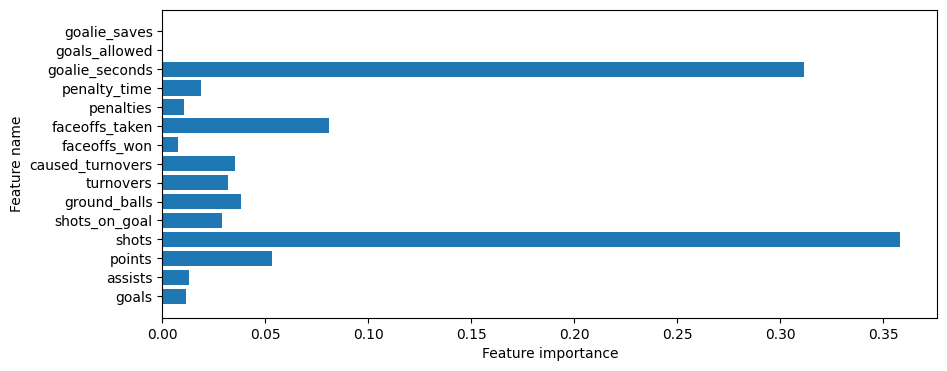

In [24]:
feats = df_noblanks.drop('position', axis=1)
plt.figure(figsize=(10,4))
plot_feature_importances(dectree_clf, feats.columns)
plt.show()

Interesting. Goalie_seconds and shots are by far important with faceoff_taken and points coming next.

Do some ablation by removing important and unimportant features and see what the scores come out to be

In [25]:
#plot_decision_tree(dectree_clf, feats.columns, y)  #can't run this

Trying a decision tree with max depth = 3

In [19]:
dectree_clf2 = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
print('training accuracy: {:.2f}'.format(dectree_clf2.score(X_train,y_train)))
print('test accuracy: {:.2f}'.format(dectree_clf2.score(X_test, y_test)))

training accuracy: 0.71
test accuracy: 0.71


Gaussian 

In [26]:
from sklearn.naive_bayes import GaussianNB

do Gaussian with default parameters

In [27]:
gauclf = GaussianNB().fit(X_train, y_train)
print('Gaussian training accuracy: {:.2f}'.format(gauclf.score(X_train,y_train)))
print('Gaussian test accuracy: {:.2f}'.format(gauclf.score(X_test, y_test)))

Gaussian training accuracy: 0.72
Gaussian test accuracy: 0.72


In [28]:
gauclf.predict(X_test)[:5]

array(['A', 'M', 'D', 'A', 'M'], dtype='<U1')

The accuracy score looks better than decision tree but not as good as knn. The first 5 are the same as DT and KNN
Run with the range later

In [25]:
#for r in range(60, 96, 5):
#    print(r)
#    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=r, random_state=42)
#    gauclf = GaussianNB().fit(X_train, y_train)
#    print('Gaussian training accuracy: {:.2f}'.format(gauclf.score(X_train,y_train)))
#    print('Gaussian test accuracy: {:.2f}'.format(gauclf.score(X_test, y_test)))

60
Gaussian training accuracy: 0.90
Gaussian test accuracy: 0.67
65
Gaussian training accuracy: 0.88
Gaussian test accuracy: 0.70
70
Gaussian training accuracy: 0.86
Gaussian test accuracy: 0.70
75
Gaussian training accuracy: 0.84
Gaussian test accuracy: 0.70
80
Gaussian training accuracy: 0.84
Gaussian test accuracy: 0.70
85
Gaussian training accuracy: 0.82
Gaussian test accuracy: 0.70
90
Gaussian training accuracy: 0.81
Gaussian test accuracy: 0.70
95
Gaussian training accuracy: 0.81
Gaussian test accuracy: 0.70


In [21]:
gauclf = GaussianNB().fit(X_train, y_train)
print('Gaussian training accuracy: {:.2f}'.format(gauclf.score(X_train,y_train)))
print('Gaussian test accuracy: {:.2f}'.format(gauclf.score(X_test, y_test)))

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
for r in range(60, 96, 5):
    print(r)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=r, random_state=42)
    rfclf = RandomForestClassifier(n_estimators=10, random_state=42).fit(X_train, y_train)
    print('Random Forest training accuracy: {:.2f}'.format(rfclf.score(X_train,y_train)))
    print('Random Forest test accuracy: {:.2f}'.format(rfclf.score(X_test, y_test)))

60
Random Forest training accuracy: 0.98
Random Forest test accuracy: 0.64
65
Random Forest training accuracy: 0.97
Random Forest test accuracy: 0.68
70
Random Forest training accuracy: 0.96
Random Forest test accuracy: 0.69
75
Random Forest training accuracy: 0.96
Random Forest test accuracy: 0.67
80
Random Forest training accuracy: 0.97
Random Forest test accuracy: 0.68
85
Random Forest training accuracy: 0.98
Random Forest test accuracy: 0.67
90
Random Forest training accuracy: 0.93
Random Forest test accuracy: 0.66
95
Random Forest training accuracy: 0.93
Random Forest test accuracy: 0.66


In [30]:
rfclf = RandomForestClassifier(n_estimators=10, random_state=42).fit(X_train, y_train)
print('Random Forest training accuracy: {:.2f}'.format(rfclf.score(X_train,y_train)))
print('Random Forest test accuracy: {:.2f}'.format(rfclf.score(X_test, y_test)))

Random Forest training accuracy: 0.81
Random Forest test accuracy: 0.72


In [31]:
rfclf.predict(X_test)[:5]

array(['A', 'M', 'D', 'A', 'M'], dtype=object)

Let's do this all over again but with dimenionality reduction

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import NeighborhoodComponentsAnalysis

In [33]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X_train, y_train)
ldaknn = knn.fit(lda.transform(X_train), y_train)
ldaknn.score(lda.transform(X_test), y_test)


0.7121182868359237

In [35]:
ldaknn.predict(lda.transform(X_test))[:5]

array(['A', 'M', 'D', 'A', 'M'], dtype=object)

In [32]:
for r in range(60, 96, 5):
    print(r)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=r, random_state=42)
    lda.fit(X_train, y_train)
    ldaknn = knn.fit(lda.transform(X_train), y_train)
    #print('lda training accuracy: {:.2f}'.format(ldaknn.score(lda.transform(X_train), y_train)))
    print('lda test accuracy: {:.2f}'.format(ldaknn.score(lda.transform(X_test), y_test)))

60


ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 180, n_samples_fit = 60, n_samples = 248556

In [ ]:
#model.fit(X_train, y_train)
#knn.fit(model.transform(X_train), y_train)
#acc_knn = knn.score(model.transform(X_test), y_test)


In [27]:
nca = NeighborhoodComponentsAnalysis(n_components=2, random_state=42)
nca.fit(X_train, y_train)
ncaknn = knn.fit(nca.transform(X_train), y_train)
ncaknnscore = ncaknn.score(nca.transform(X_test), y_test)
ncaknnscore

MemoryError: Unable to allocate 259. GiB for an array with shape (186462, 186462) and data type float64